# Minikube - Deploying Aquarius, Elasticsearch and Provider

## Elasticsearch

we will use Helm to deploy elasticsearch and also we will have to change some of Minikube's config to do this

**Resources**

    - Helm Hub- https://artifacthub.io/packages/helm/elastic/elasticsearch
   
    - DockerCompose - https://www.elastic.co/guide/en/elasticsearch/reference/7.17/docker.html
   
    - GitHub - https://github.com/elastic/helm-charts/tree/main/elasticsearch

### Changing Minikube Configs

Execute the below in sequence
`minikube start` # starts the minikube

`minikube config set cpus 4`

`minikube config set memory 14384`

You might have to delete the cluster and start again for these changes to take affect 

`minikube addons enable default-storageclass`

`minikube addons enable storage-provisioner`

### Launch elasticsearch db using Helm

You will need to install Helm and then execute the following

`helm repo add elastic https://helm.elastic.co`

`helm repo update`

`helm install elasticsearch elastic/elasticsearch -f helm_elastic_values.yml --namespace=ocean --create-namespace --wait`
- elasticsearch after install is the release name similar to deployment name when usingg `kubectl` 
- we use the `helm_elastic_values.yml` to change the default values in the helm chart. There is `helm_elastic_values.yml` in this folder. We will use mostly default. All available values cen be found [here](https://artifacthub.io/packages/helm/elastic/elasticsearch?modal=values)
- we can also use `--version` to select a specific version of the elasticimage image


With that we have deployed both the deployment and service for elasticsearch

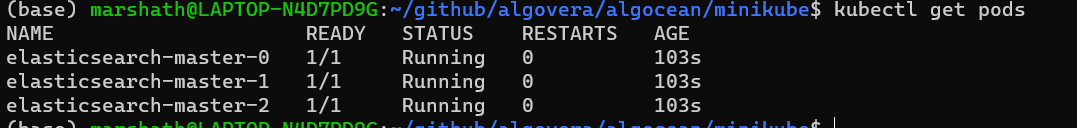

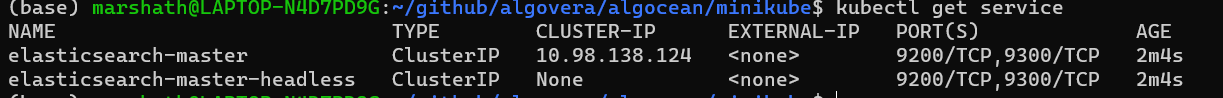

## Launching Aquarius 

**Resources**
- https://docs.oceanprotocol.com/building-with-ocean/deploying-components/deploying-aquarius
- https://github.com/oceanprotocol/aquarius/tree/main/deploymen

`kubectl apply -f=k8s-aquarius.yml --namespace=ocean` 

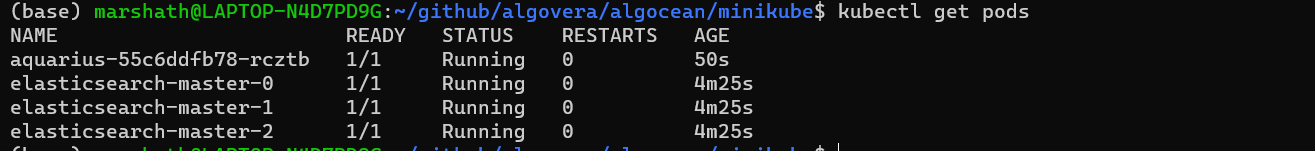

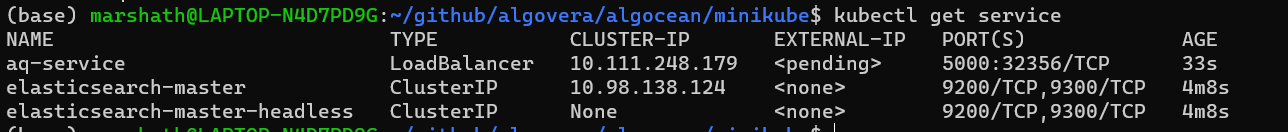

Because we are using LoadBalancer for aq-service - lets try to connect

Expose the LoadBalancer by

`minikube service aq-service --namespace=ocean`

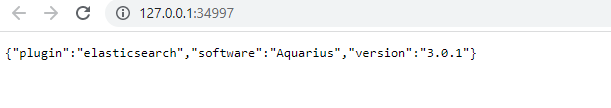

## Launch Provider

**Resources**
- https://docs.oceanprotocol.com/building-with-ocean/deploying-components/deploying-provider
- https://github.com/oceanprotocol/provider/tree/main/deployment

`kubectl apply -f=k8s-provider.yml --namespace=ocean`

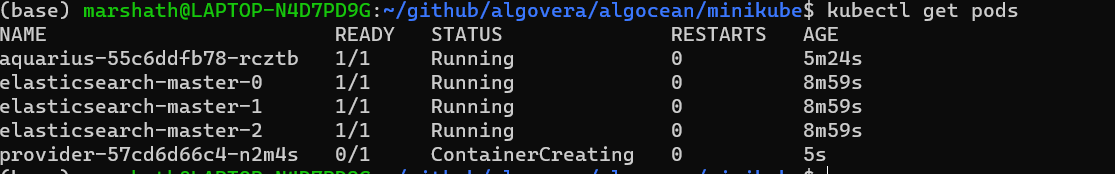

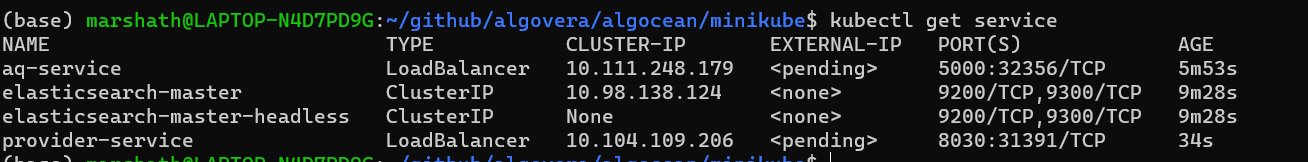

Lets expose and provider-service LoadBalancer

`minikube service provider-service --namespace=ocean`

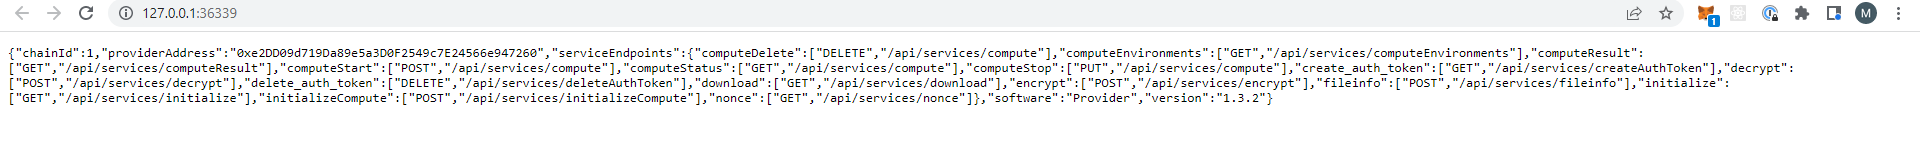

# Next to do

- verify the three are talking to each other
- contact the provider/aq through algoocean